In [10]:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sys

from scipy.interpolate import spline

In [11]:
def sac_dm(filename, GROUP_SIZE):

	data = np.genfromtxt(filename, delimiter=' ', names=['x', 'y'])
	# data = np.genfromtxt(filename, delimiter=';', names=['y'])

	threshold = 0.0

	DATASET_SIZE = len(data['y'])

	rho = 0.0

	GROUP_AMOUNT = 1 + int(DATASET_SIZE)/GROUP_SIZE
	sacdm=[0.0] * int(GROUP_AMOUNT)


	up = 0
	peaks = 0
	i = 0
	n = GROUP_SIZE
	j = 0
	while i < DATASET_SIZE-2:
		a = data['y'][i]
		b = data['y'][i+1]
		c = data['y'][i+2]

		if b > (a+threshold) and b > (c+threshold):
			peaks = peaks + 1
			
		if i == n:
			rho = peaks/float(GROUP_SIZE)

			if rho != 0:
				# sacdm[j] = rho 
				sacdm[j]=1/(6*rho)
			else:
				sacdm[j] = 0
			j = j + 1
			n = n + GROUP_SIZE
			peaks = 0
		i = i+1

	print("Average: ", sum(sacdm)/len(sacdm))
	return sacdm

# Upload files to compare

In [25]:
sac = sac_dm("dados/C100_F5k_ON.txt", 1000)
sac2 = sac_dm("dados/C100_F5k_D1_P2_R1.txt", 1000)
sac3 = sac_dm("dados/C100_F5k_D1_P2_R2.txt", 1000)
sac4 = sac_dm("dados/C100_F5k_D1_P1_R1.txt", 1000)
sac5 = sac_dm("dados/C100_F5k_D1_P1_R2.txt", 1000)


Average:  3.312019190216666
Average:  2.574377833283372
Average:  2.567255420696438
Average:  2.3908130754246577
Average:  2.306940051551028


/home/maelso/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


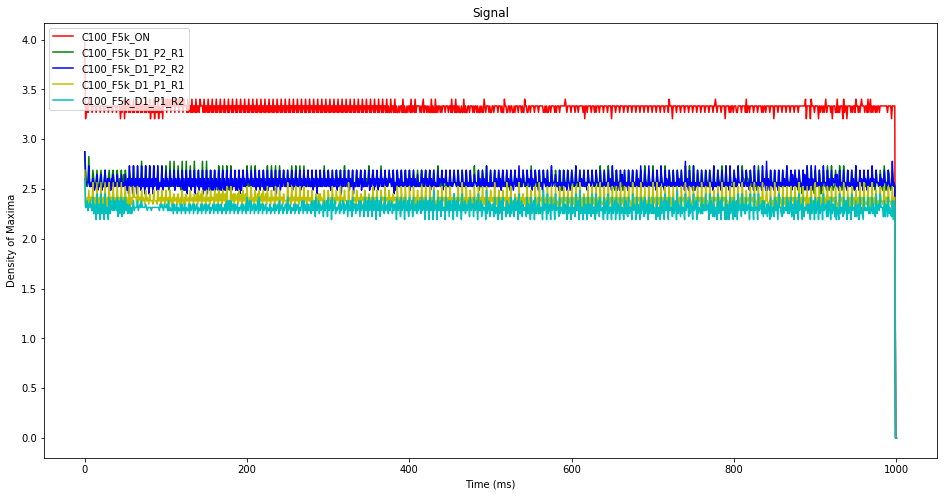

In [26]:
fig = plt.figure(figsize=(16, 8))

plt.ylabel('Density of Maxima') 
plt.xlabel('Time (ms)')
ax = fig.add_subplot(111)
ax.set_title("Signal")
ax.plot(sac,color='r', label='C100_F5k_ON')
ax.plot(sac2,color='g', label='C100_F5k_D1_P2_R1')
ax.plot(sac3,color='b', label='C100_F5k_D1_P2_R2')
ax.plot(sac4,color='y', label='C100_F5k_D1_P1_R1')
ax.plot(sac5,color='c', label='C100_F5k_D1_P1_R2')

ax.legend(['C100_F5k_ON', 'C100_F5k_D1_P2_R1', 'C100_F5k_D1_P2_R2', 'C100_F5k_D1_P1_R1', 'C100_F5k_D1_P1_R2'], loc='upper left')